In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('./OEP Data.csv')

In [5]:
df.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


In [643]:
df.rename(columns={"HOEP": "¢/kWh", "Relative_Humidity": "Humidity"}, inplace=True)
df2=df[['Date','Hour','¢/kWh','Temperature','Humidity']]
df2.to_csv("OEP_refined.csv")
df2

,Date,Hour,¢/kWh,Temperature,Humidity
0,2016-01-01,0,0.49,-0.3,70
1,2016-01-01,1,-1.09,-0.3,68
2,2016-01-01,2,-2.41,-0.4,73
3,2016-01-01,12,0.00,-2.1,76
4,2016-01-01,13,0.00,-2.4,84
...,...,...,...,...,...
39403,2020-12-31,19,36.85,0.2,74
39404,2020-12-31,20,19.69,-0.2,65
39405,2020-12-31,21,20.78,-3.0,80
39406,2020-12-31,22,27.85,-0.8,70


In [8]:
df2.describe()

,Hour,¢/kWh,Temperature,Humidity
count,39408.000000,39408.000000,39408.000000,39408.000000
mean,11.625076,13.923340,9.421272,68.028598
std,6.945136,11.902378,10.899602,16.773789
min,0.000000,-2.770000,-26.000000,13.000000
25%,6.000000,3.300000,0.800000,57.000000
50%,12.000000,12.950000,8.600000,69.000000
75%,18.000000,22.510000,19.000000,81.000000
max,23.000000,44.110000,35.100000,100.000000


In [9]:
df2['¢/kWh'].isnull().sum()
df2['¢/kWh'].isna().sum()

0

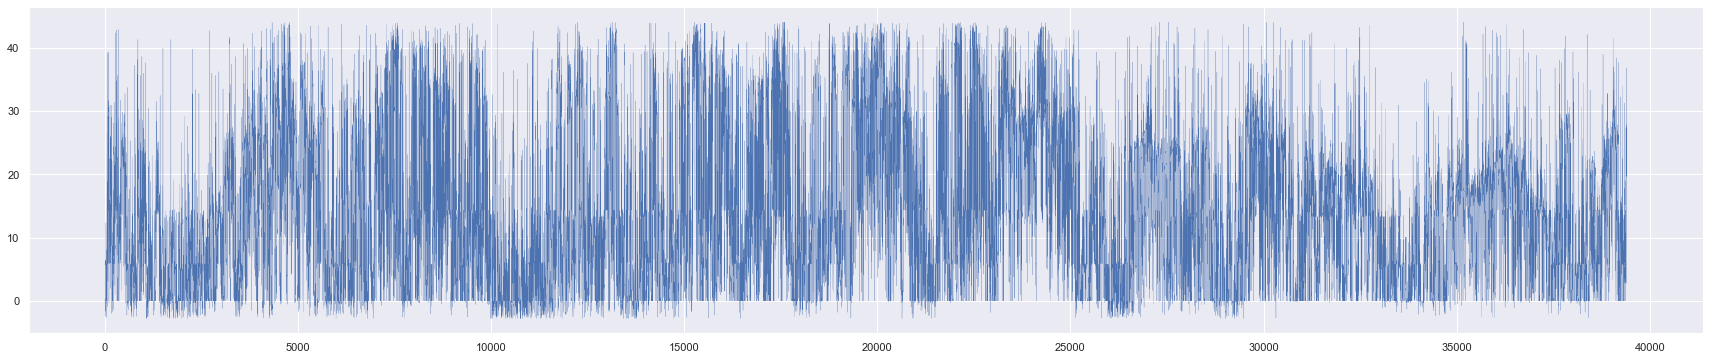

In [10]:
sns.set_theme(rc={'figure.figsize':(30, 6)})
df2['¢/kWh'].plot(linewidth=0.2);

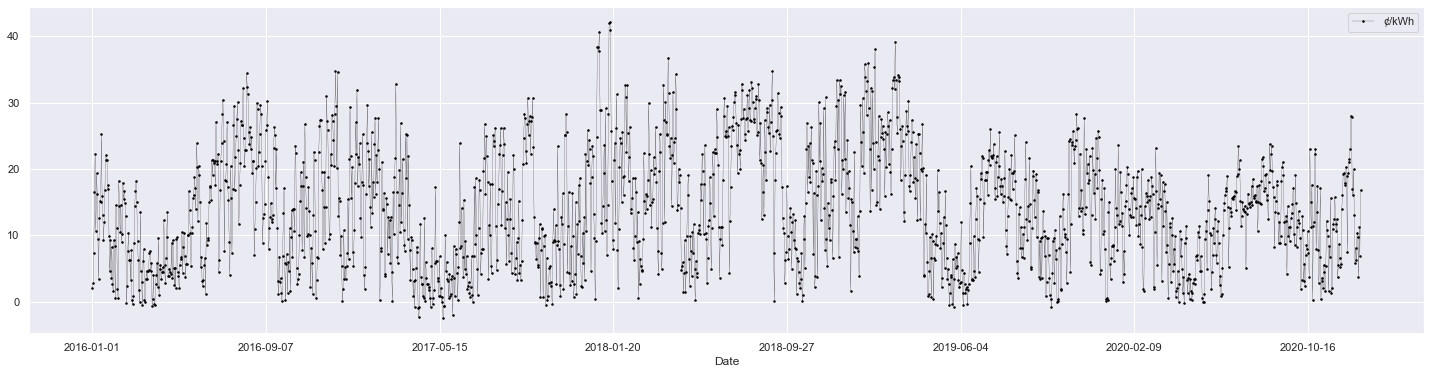

In [11]:
df3=df2.groupby(df2['Date'])['¢/kWh'].mean()
df3=pd.DataFrame(df3)
sns.set_theme(rc={'figure.figsize':(25, 6)})
df3.plot(linewidth=0.2, color='black', marker='.', markersize=3);

In [12]:
roll_mean = df3['¢/kWh'].rolling(window=10, center=False).mean()
roll_std = df3['¢/kWh'].rolling(window=10, center=False).std()

<Figure size 2520x864 with 0 Axes>

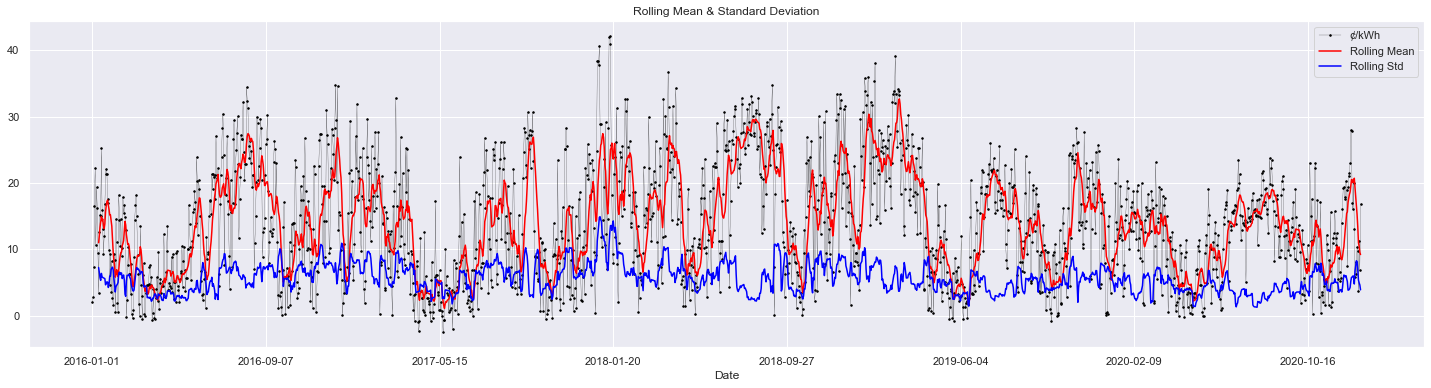

In [13]:
fig = plt.figure(figsize=(35,12))
df3.plot(label='Original',linewidth=0.2, color='black', marker='.', markersize=3)
roll_mean.plot(color='red', label='Rolling Mean')
roll_std.plot(color='blue', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### The Weekly Price Change

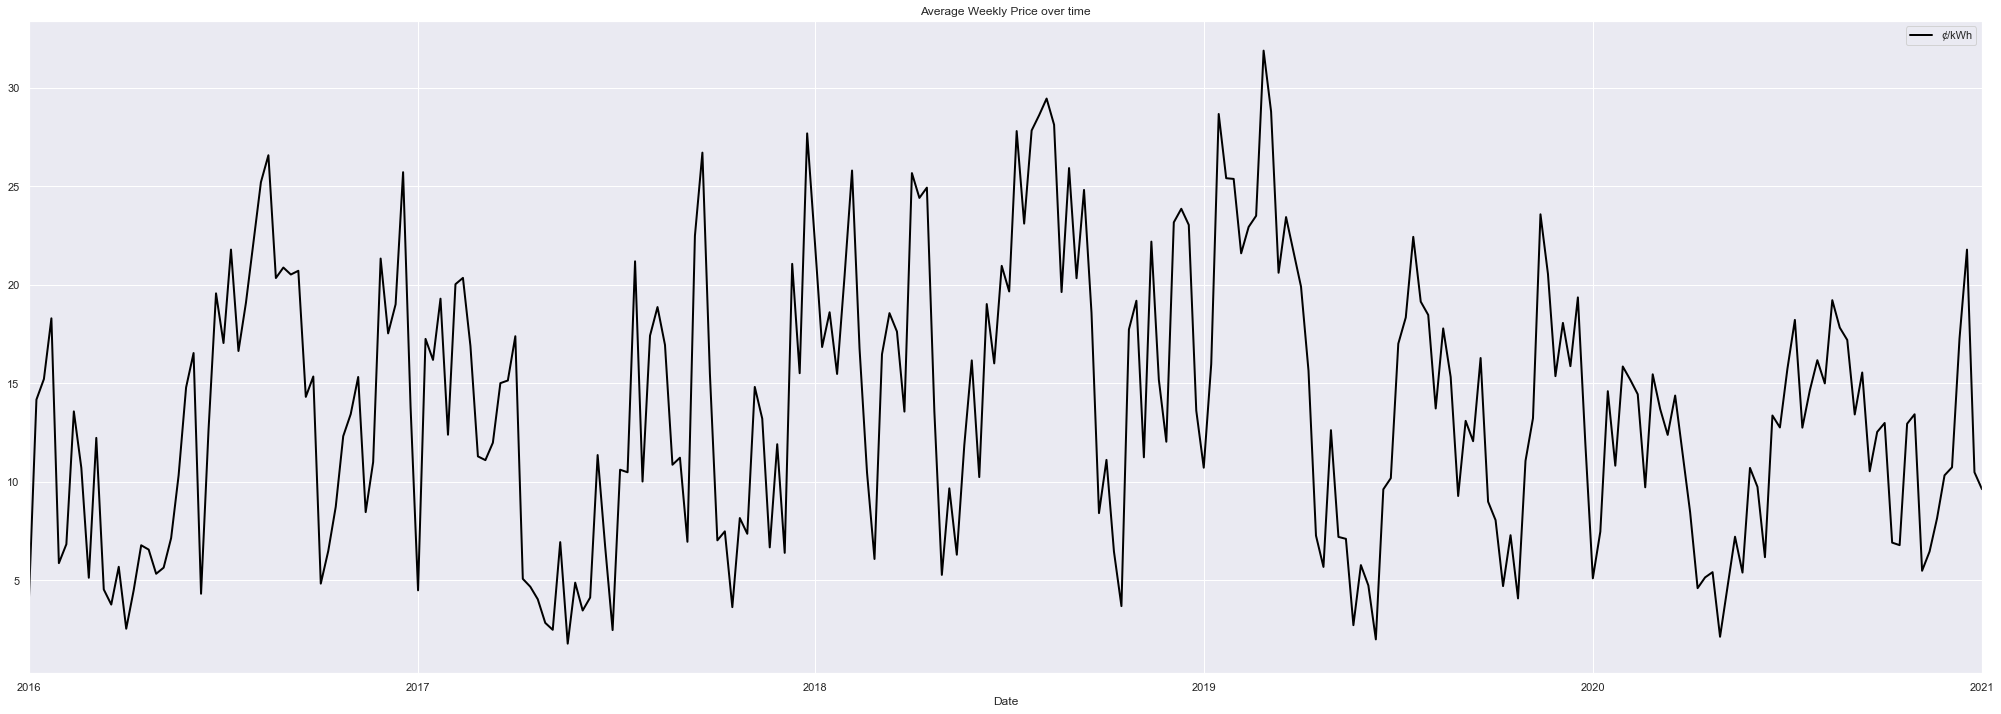

In [91]:
df_weekly=df2.copy()
df_weekly['Date'] = pd.to_datetime(df_weekly.Date)
df_weekly['Date'] +=  pd.to_timedelta(df_weekly.Hour, unit='h')
df_weekly = df_weekly.set_index('Date').resample('w').mean()
sns.set(rc={'figure.figsize':(35, 12)})
df_weekly['¢/kWh'].plot(linewidth=2, title = 'Average Weekly Price over time', color='black');
plt.legend(loc='best')

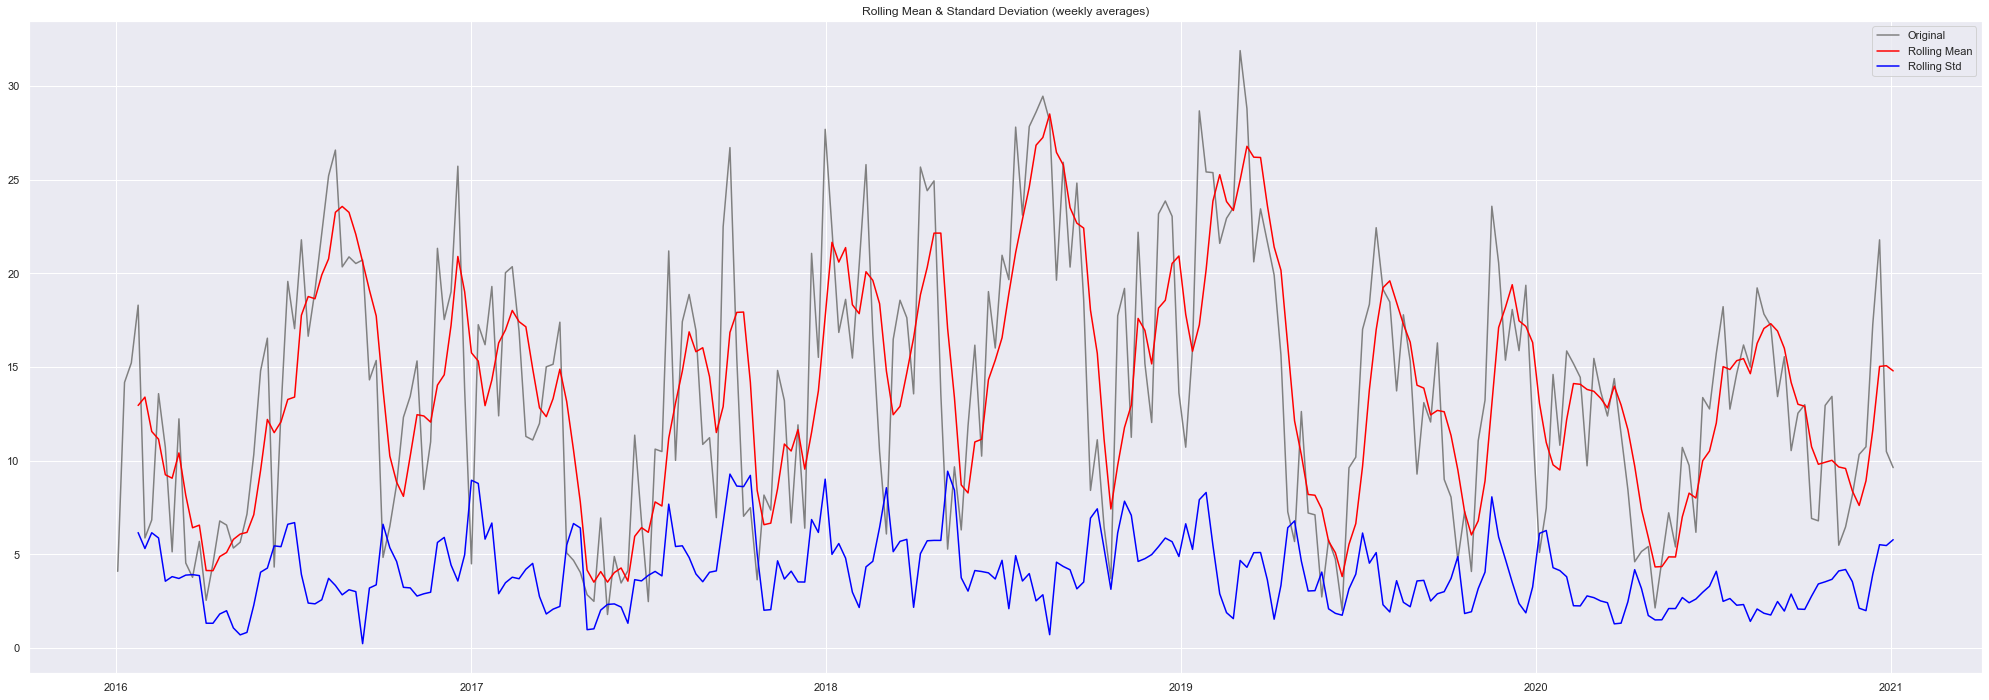

In [588]:
weekly_roll_mean = df_weekly['¢/kWh'].rolling(window=4, center=False).mean()
weekly_roll_std = df_weekly['¢/kWh'].rolling(window=4, center=False).std()


fig = plt.figure(figsize=(35, 12))
plt.plot(df_weekly['¢/kWh'], label='Original', color='gray')
plt.plot(weekly_roll_mean, color='red', label='Rolling Mean')
plt.plot(weekly_roll_std, color='blue', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (weekly averages)')
plt.show(block=False)

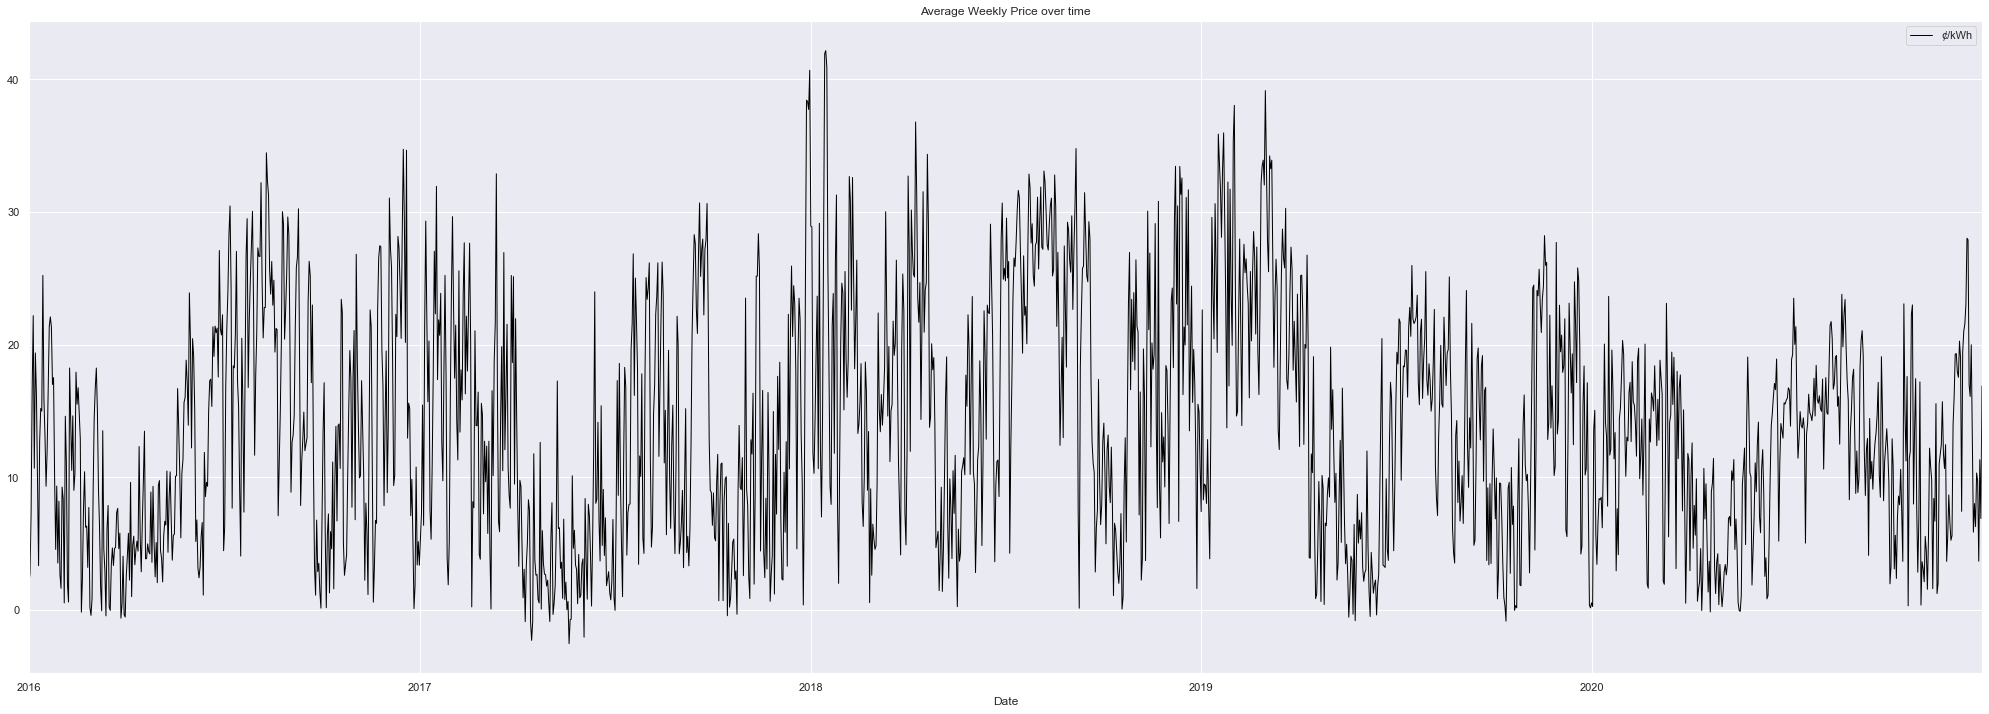

In [90]:
df_daily=df2.copy()
df_daily['Date'] = pd.to_datetime(df_daily.Date)
df_daily['Date'] +=  pd.to_timedelta(df_daily.Hour, unit='h')
df_daily = df_daily.set_index('Date').resample('D').mean()
sns.set(rc={'figure.figsize':(35, 12)})
df_daily['¢/kWh'].plot(linewidth=1, title = 'Average Weekly Price over time', color='black');
plt.legend(loc='best')

## Monthly Price Change

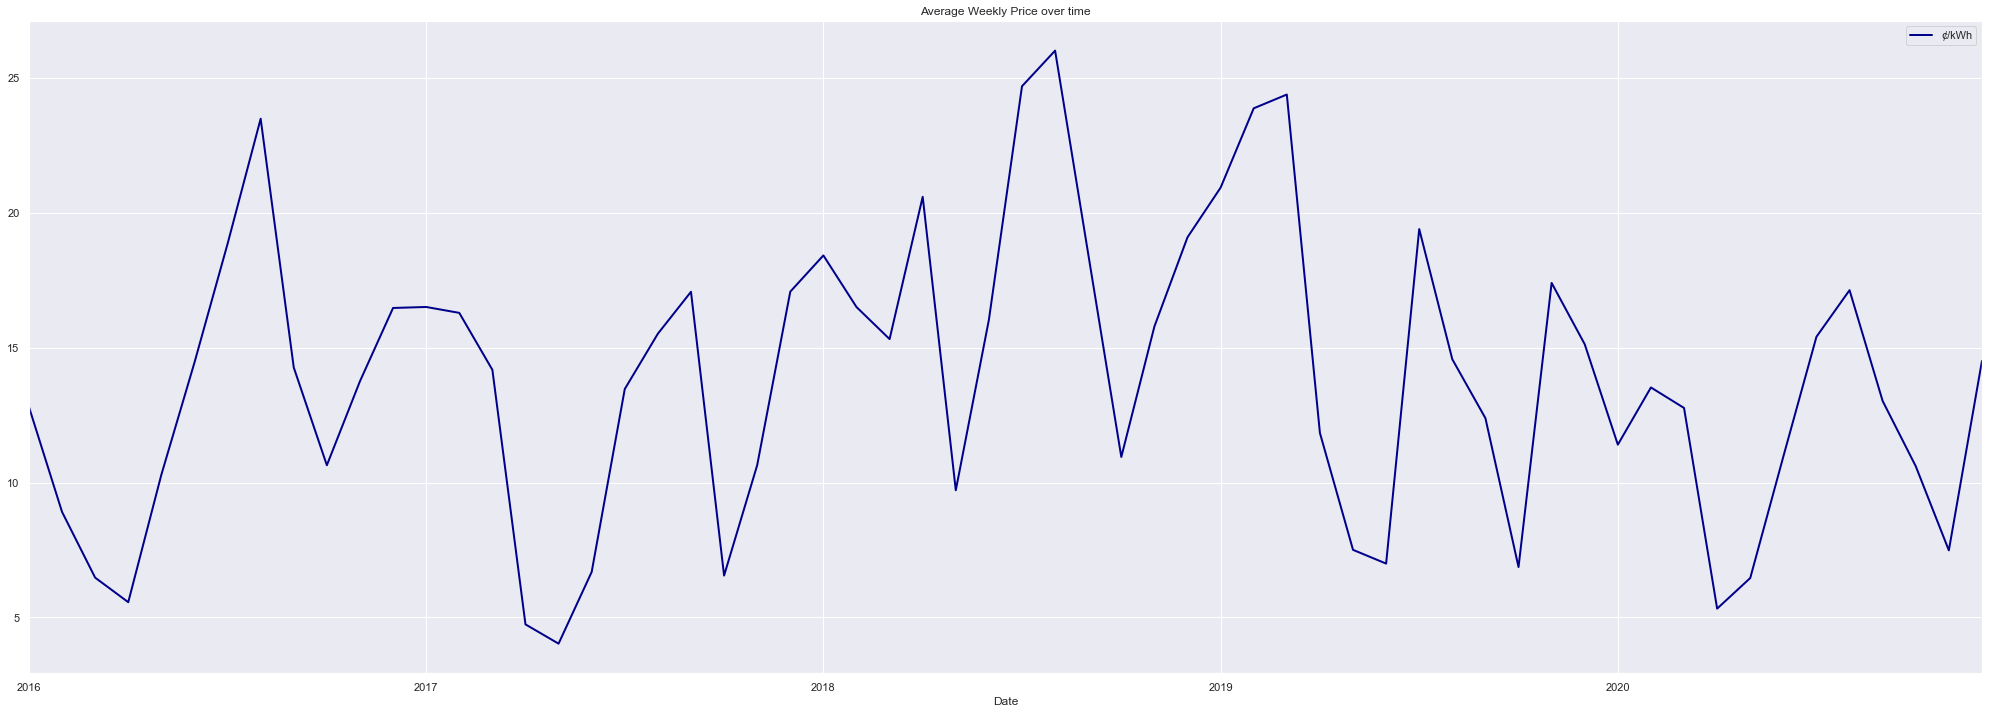

In [575]:
df_month=df2.copy()
df_month['Date'] = pd.to_datetime(df_month.Date)
df_month['Date'] +=  pd.to_timedelta(df_month.Hour, unit='h')
df_month = df_month.set_index('Date').resample('m').mean()
sns.set(rc={'figure.figsize':(35, 12)})
df_month['¢/kWh'].plot(linewidth=2, title = 'Average Weekly Price over time', color='darkblue');
plt.legend(loc='best')

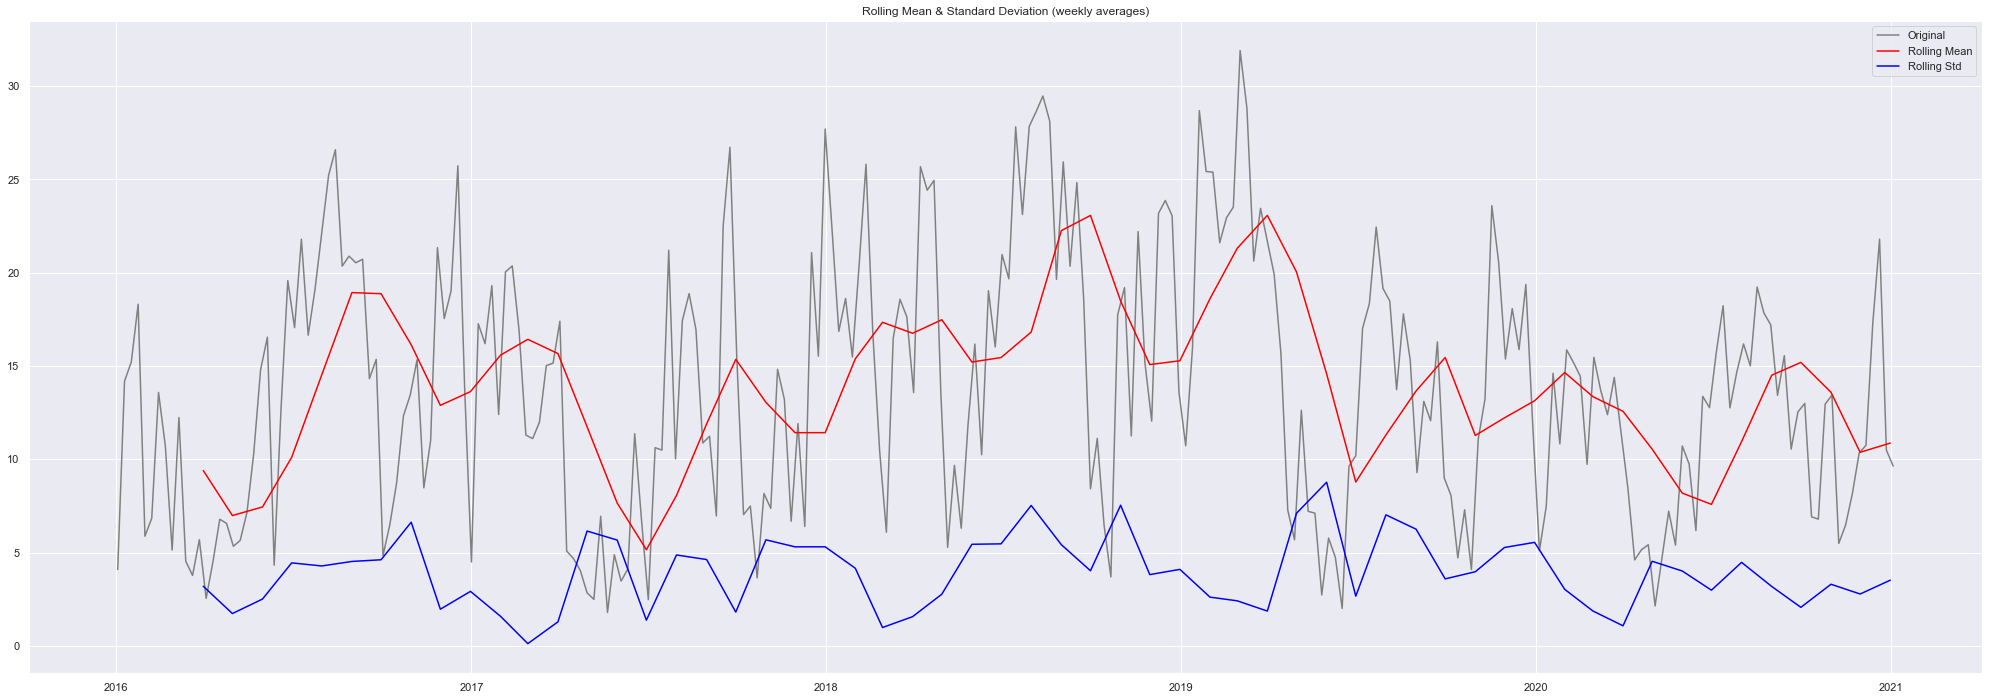

In [587]:
monthly_roll_mean = df_month['¢/kWh'].rolling(window=3, center=False).mean()
monthly_roll_std = df_month['¢/kWh'].rolling(window=3, center=False).std()

fig = plt.figure(figsize=(35, 12))
plt.plot(df_weekly['¢/kWh'], label='Original', color='gray')
plt.plot(monthly_roll_mean, color='red', label='Rolling Mean')
plt.plot(monthly_roll_std, color='blue', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (weekly averages)')
plt.show(block=False)

## One Day Price Change

Text(0.5, 0, 'In 24 Hours')

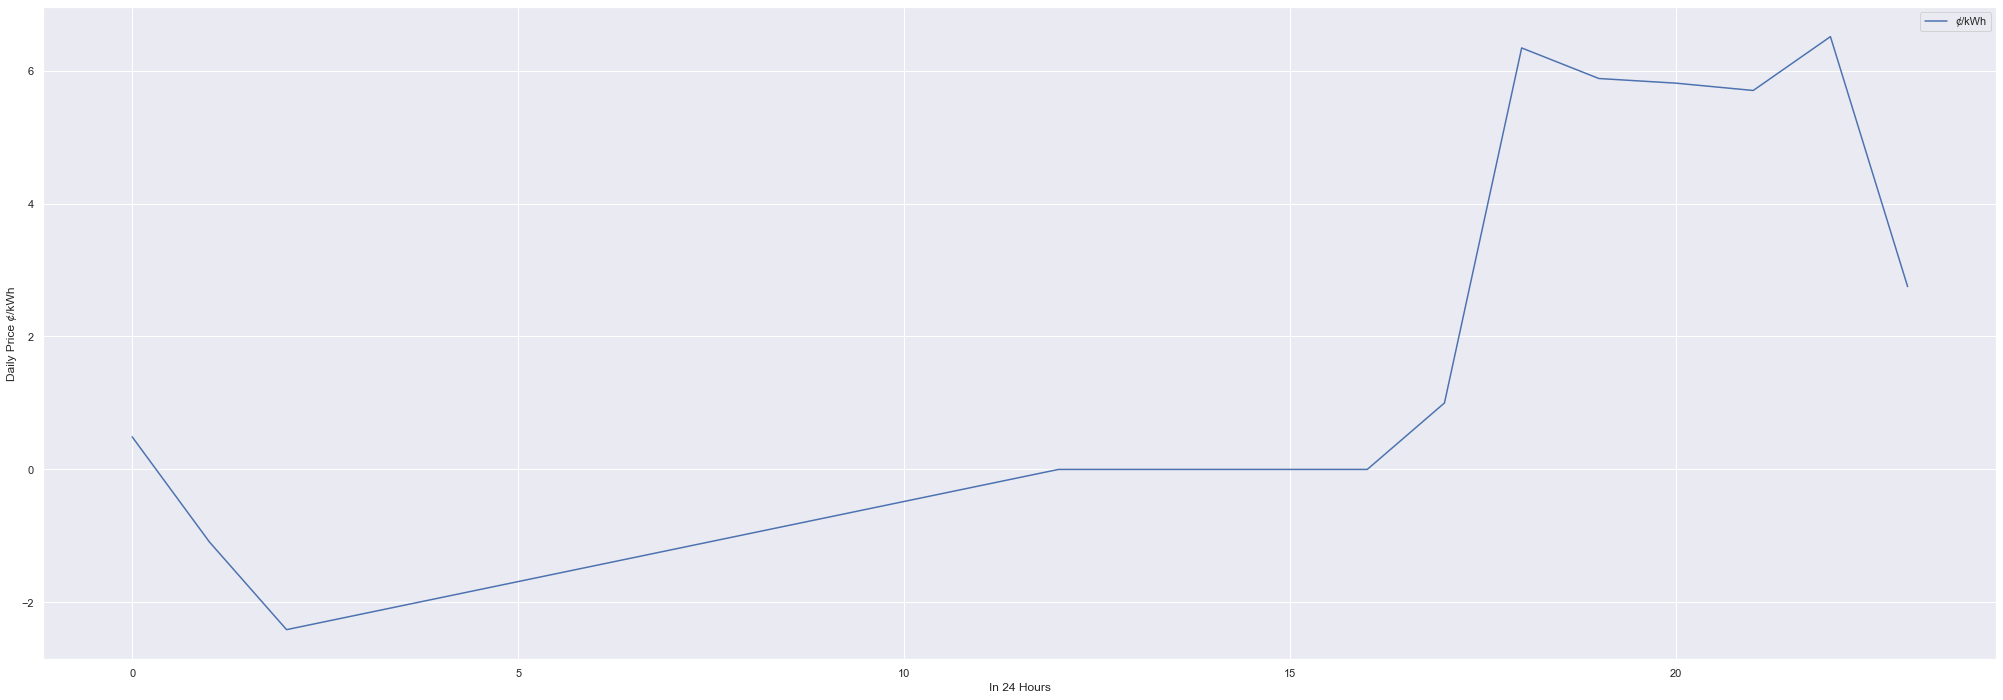

In [185]:
df_day=df2.copy()
df_day['Date']=df_day['Date']
df_day=df_day[df_day['Date']=='2016-01-01']
df_day.plot(y='¢/kWh', x='Hour')
plt.ylabel('Daily Price ¢/kWh')
plt.xlabel('In 24 Hours')

## Hourly Price Over Each Year

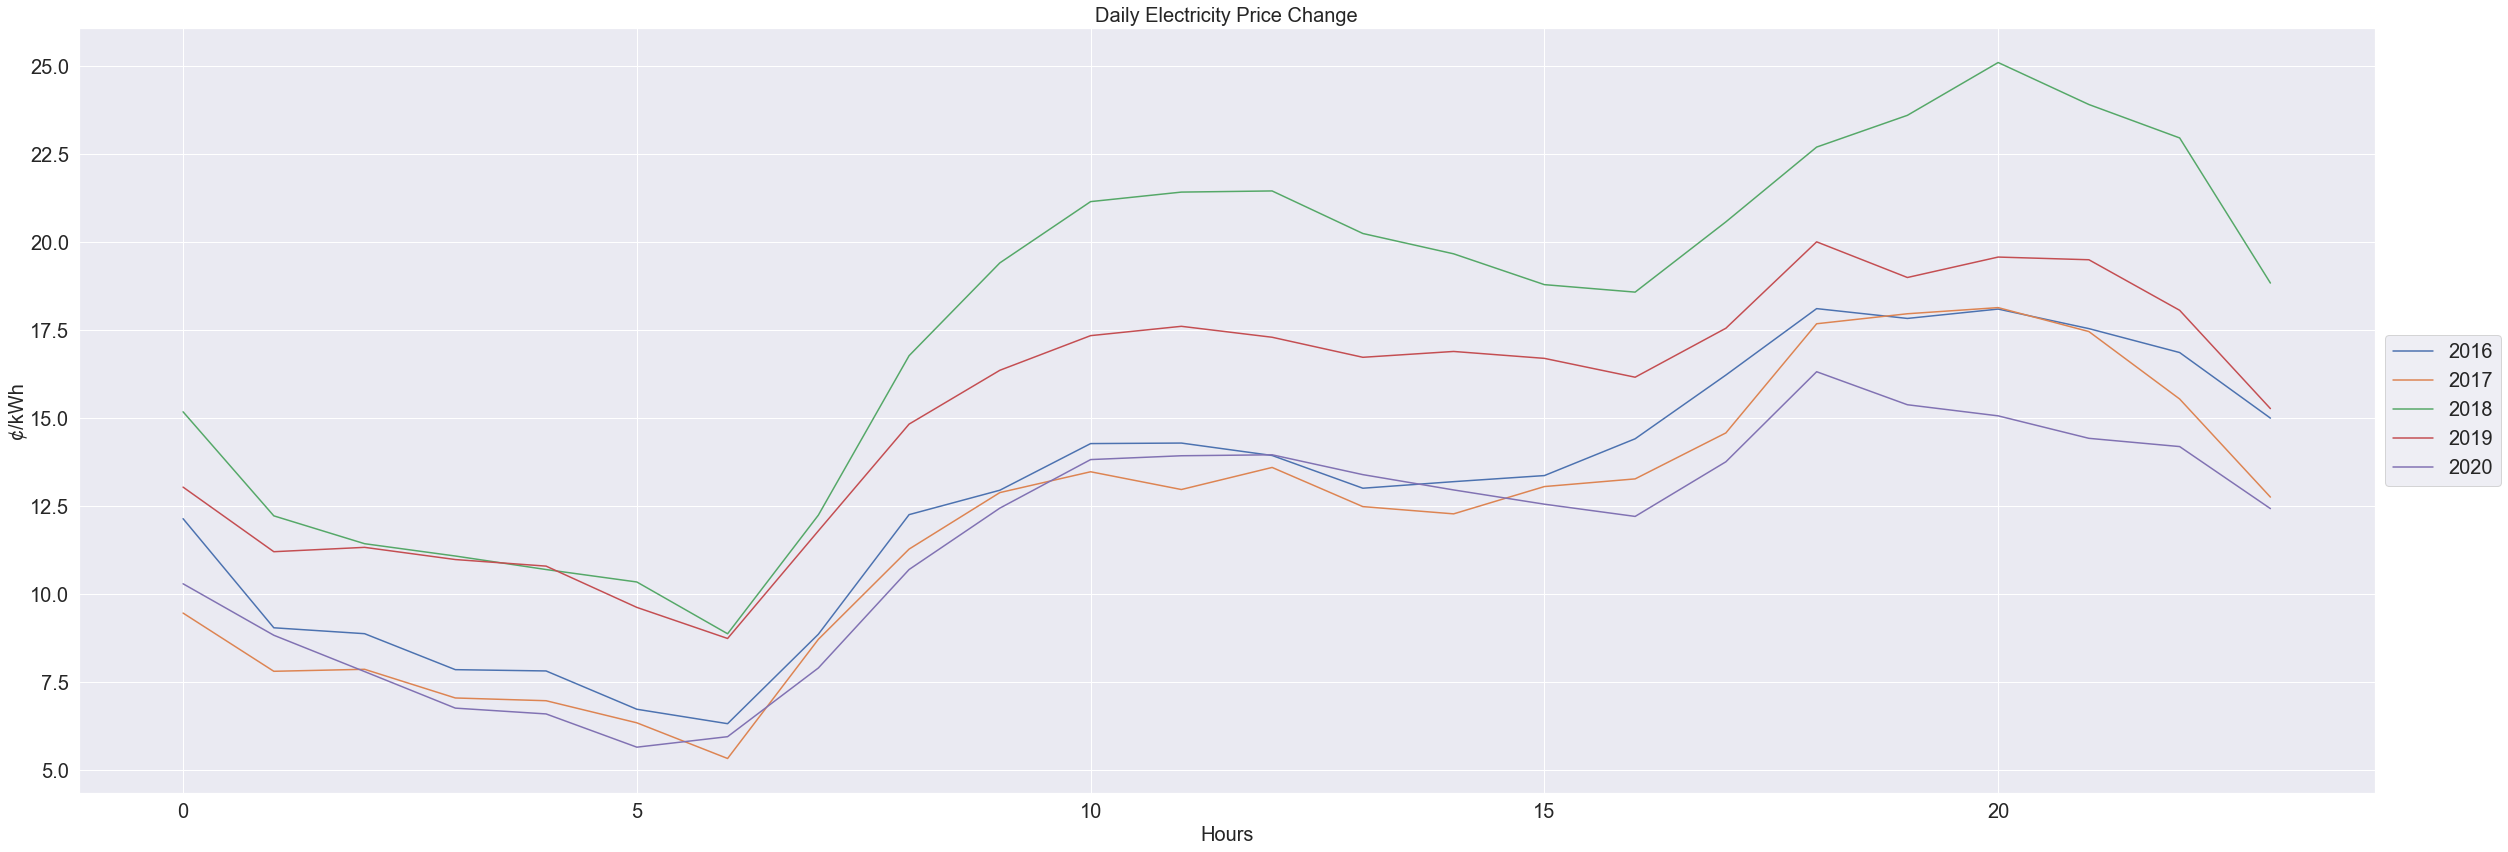

In [565]:
df_hourly=df2.copy()
c_2016=df_hourly.loc[(dftest2['Date'].astype(str).str[0:4]=='2016')].groupby(['Hour'])['¢/kWh'].mean()
c_2017=df_hourly.loc[(dftest2['Date'].astype(str).str[0:4]=='2017')].groupby(['Hour'])['¢/kWh'].mean()
c_2018=df_hourly.loc[(dftest2['Date'].astype(str).str[0:4]=='2018')].groupby(['Hour'])['¢/kWh'].mean()
c_2019=df_hourly.loc[(dftest2['Date'].astype(str).str[0:4]=='2019')].groupby(['Hour'])['¢/kWh'].mean()
c_2020=df_hourly.loc[(dftest2['Date'].astype(str).str[0:4]=='2020')].groupby(['Hour'])['¢/kWh'].mean()

c_columns={'2016':c_2016,'2017':c_2017, '2018':c_2018, '2019':c_2019,'2020':c_2020 }
df_hourly=pd.DataFrame(data=c_columns)

c_plot = df_hourly.plot(title='Data by Year', figsize=(35, 12))
c_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5) ,prop={'size': 20})
c_plot.set_ylabel('¢/kWh', fontsize=20)
c_plot.set_xlabel('Hours', fontsize=20)

c_plot.set_title('Daily Electricity Price Change', fontsize=20)
c_plot.tick_params(axis='both', which='major', labelsize=20)

c_plot.figure.tight_layout()
plt.show()
#plt.savefig(fname = 'spaghetti.png')

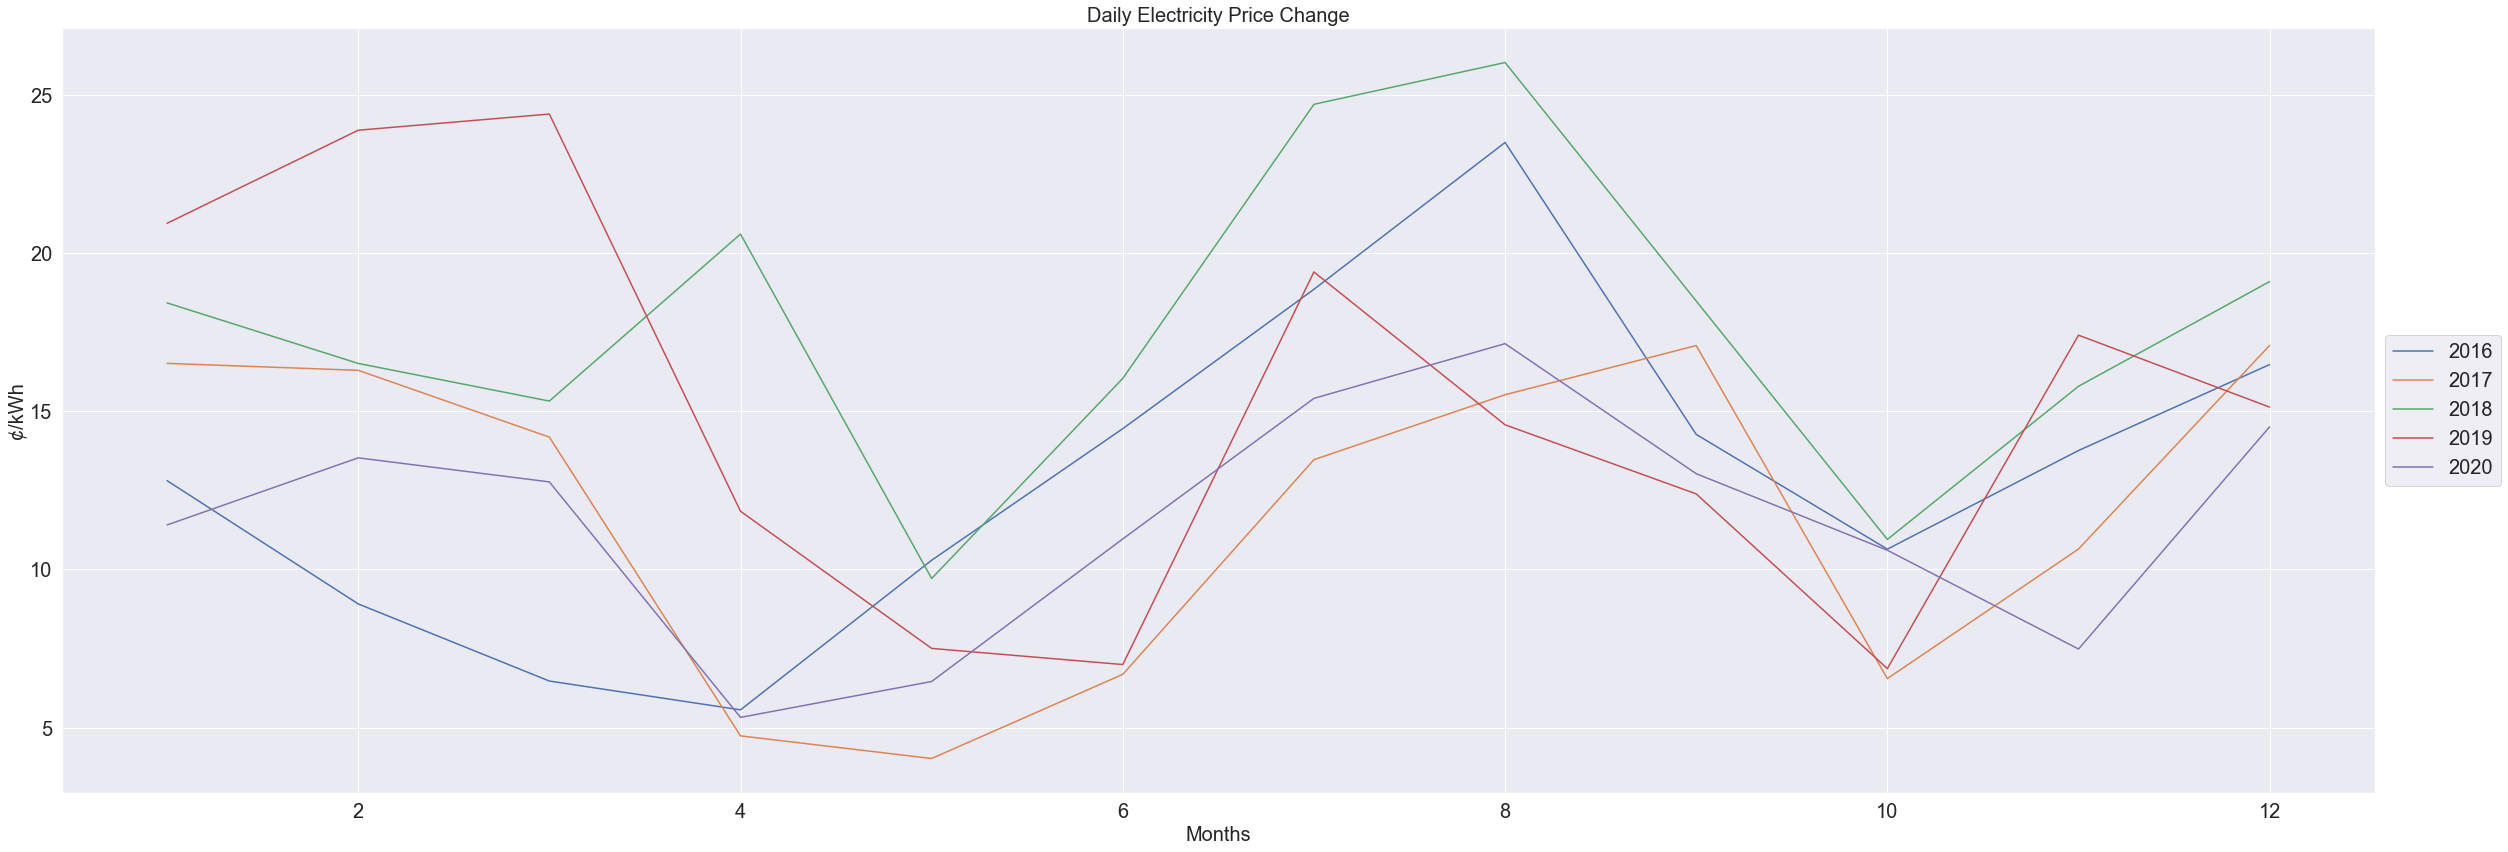

In [566]:
df_monthly=df2.copy()
df_monthly['Date'] = pd.to_datetime(df_monthly.Date)
df_monthly['Date'] +=  pd.to_timedelta(df_monthly.Hour, unit='h')
df_monthly = df_monthly.set_index('Date').resample('M').mean()
m_2016= df_monthly.loc['2016-01-31':'2016-12-31']['¢/kWh'].array
m_2017= df_monthly.loc['2017-01-31':'2017-12-31']['¢/kWh'].array
m_2018= df_monthly.loc['2018-01-31':'2018-12-31']['¢/kWh'].array
m_2019= df_monthly.loc['2019-01-31':'2019-12-31']['¢/kWh'].array
m_2020= df_monthly.loc['2020-01-31':'2020-12-31']['¢/kWh'].array

df_monthly=pd.DataFrame({'2016':m_2016, '2017':m_2017, '2018':m_2018, '2019':m_2019,'2020':m_2020 }, 
                        index=[1,2,3,4,5,6,7,8,9,10,11,12])

m_plot = df_monthly.plot(title='Data by Year', figsize=(35, 12))
m_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5) ,prop={'size': 20})
m_plot.set_ylabel('¢/kWh', fontsize=20)
m_plot.set_xlabel('Months', fontsize=20)

m_plot.set_title('Daily Electricity Price Change', fontsize=20)
m_plot.tick_params(axis='both', which='major', labelsize=20)

m_plot.figure.tight_layout()
plt.show()

## Monthly Price Change by Temperature

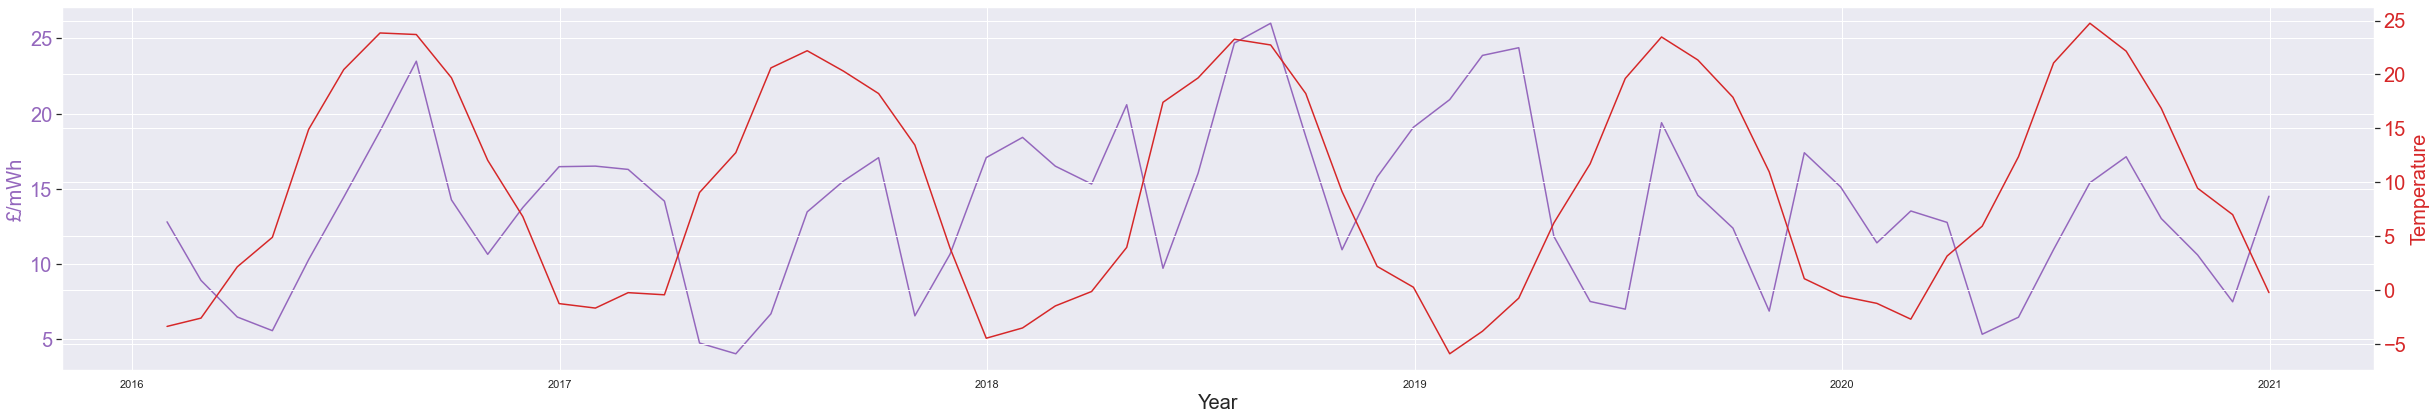

In [618]:
t=df_month.index
Price_monthly= df_month['¢/kWh']
Temp= df_month['Temperature']
fig, ax1 = plt.subplots(figsize = (34,6))

color = 'tab:purple'
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('£/mWh', color=color, fontsize=20)
ax1.plot(t, Price_monthly, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Temperature', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(t, Temp, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#plt.savefig(fname = 'electricity_vs_naturalgas')

## Monthly Price Change by Humidity

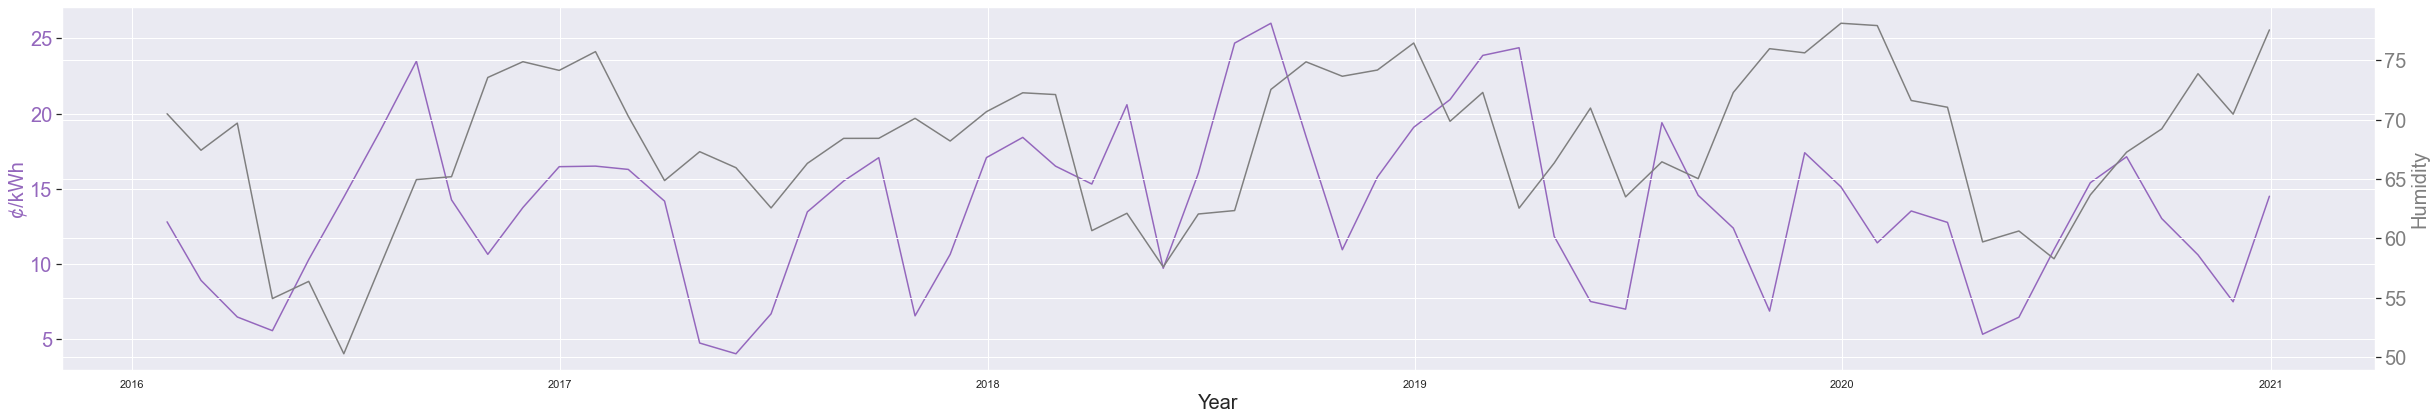

In [641]:
t=df_month.index
Price_monthly= df_month['¢/kWh']
Humidity= df_month['Humidity']
fig, ax1 = plt.subplots(figsize = (34,6))

color = 'tab:purple'
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('¢/kWh', color=color, fontsize=20)
ax1.plot(t, Price_monthly, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('Humidity', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(t, Humidity, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()